In [1]:
def keras_plotter(history):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.savefig("parte_temp.jpeg")
    plt.show()
   

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

from sklearn.model_selection import StratifiedShuffleSplit
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index,test_index in strat_split.split(x_train_val,y_train_val):
    x_train,y_train=x_train_val[train_index],y_train_val[train_index]
    x_val,y_val=x_train_val[test_index],y_train_val[test_index]
    
x_train_val=x_train_val.reshape((50000,3072))
x_train=x_train.reshape((40000,3072))
x_val=x_val.reshape((10000,3072))
x_test=x_test.reshape((10000,3072))

from sklearn.preprocessing import StandardScaler
sta_scal=StandardScaler()
sta_scal.fit(x_train)
x_train_val=sta_scal.transform(x_train_val)
x_train=sta_scal.transform(x_train)
x_val=sta_scal.transform(x_val)
x_test=sta_scal.transform(x_test)


x_train_val=x_train_val.reshape((50000,32, 32, 3))
x_train=x_train.reshape((40000,32, 32, 3))
x_val=x_val.reshape((10000,32, 32, 3))
x_test=x_test.reshape((10000,32, 32, 3))


y_train_val=keras.utils.to_categorical(y_train_val,10)
y_train=keras.utils.to_categorical(y_train,10)
y_val=keras.utils.to_categorical(y_val,10)
y_test=keras.utils.to_categorical(y_test,10)


In [3]:
#HyperParameters Definition
import tensorflow as tf
n_hidden=20
n_units=200
act='selu'
out_act='softmax'
init='lecun_normal'
init_lr=0.0001
loss_def='categorical_crossentropy'
ep=500
opt=keras.optimizers.Nadam(learning_rate=0.0001)
loss=keras.losses.categorical_crossentropy

In [4]:
#Model Definition
import tensorflow as tf
from tensorflow import keras
#model1=Sequential()
ins=tf.keras.layers.Input(shape=x_train.shape[1:])
layer1=tf.keras.layers.Flatten(input_shape=x_train.shape[1:])(ins)
layer1=tf.keras.layers.Dense(units=n_units,activation=act,kernel_initializer=init)(layer1)
for i in range(n_hidden-1):
    layer1=tf.keras.layers.Dense(units=n_units,activation=act,kernel_initializer=init)(layer1)
    if(i%3)==0:
        layer1=tf.keras.layers.AlphaDropout(0.3)(layer1,training=True)
  
outs = tf.keras.layers.Dense(units=10,activation=out_act,kernel_initializer=init)(layer1)
model1=tf.keras.Model(inputs=ins,outputs=outs)
#model1.add()    

In [5]:
escb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,verbose=2,restore_best_weights=True)
model1.compile(optimizer=opt,loss=loss_def,metrics=['accuracy'])

In [6]:
history=model1.fit(x=x_train,y=y_train,epochs=ep,validation_data=(x_val,y_val),batch_size=32,callbacks=[escb])#

Train on 40000 samples, validate on 10000 samples
Epoch 1/500
40000/40000 [==============================] - 22s 560us/sample - loss: 2.2851 - accuracy: 0.1866 - val_loss: 2.0655 - val_accuracy: 0.2263
Epoch 2/500
40000/40000 [==============================] - 20s 495us/sample - loss: 1.9746 - accuracy: 0.2624 - val_loss: 1.8995 - val_accuracy: 0.2951
Epoch 3/500
40000/40000 [==============================] - 22s 540us/sample - loss: 1.8573 - accuracy: 0.3165 - val_loss: 1.8298 - val_accuracy: 0.3325
Epoch 4/500
40000/40000 [==============================] - 26s 645us/sample - loss: 1.7918 - accuracy: 0.3508 - val_loss: 1.7857 - val_accuracy: 0.3564
Epoch 5/500
40000/40000 [==============================] - 26s 647us/sample - loss: 1.7350 - accuracy: 0.3776 - val_loss: 1.7317 - val_accuracy: 0.3848
Epoch 6/500
40000/40000 [==============================] - 26s 649us/sample - loss: 1.6872 - accuracy: 0.3982 - val_loss: 1.6995 - val_accuracy: 0.3962
Epoch 7/500
40000/40000 [=============

40000/40000 [==============================] - 25s 636us/sample - loss: 0.8789 - accuracy: 0.6950 - val_loss: 1.7260 - val_accuracy: 0.4930
Epoch 55/500
40000/40000 [==============================] - 25s 635us/sample - loss: 0.8678 - accuracy: 0.7020 - val_loss: 1.6704 - val_accuracy: 0.5051
Epoch 56/500
40000/40000 [==============================] - 25s 636us/sample - loss: 0.8661 - accuracy: 0.7016 - val_loss: 1.6917 - val_accuracy: 0.5011
Epoch 57/500
40000/40000 [==============================] - 25s 636us/sample - loss: 0.8614 - accuracy: 0.7050 - val_loss: 1.6610 - val_accuracy: 0.5009
Epoch 58/500
40000/40000 [==============================] - 26s 645us/sample - loss: 0.8440 - accuracy: 0.7080 - val_loss: 1.6702 - val_accuracy: 0.4965
Epoch 59/500
40000/40000 [==============================] - 26s 660us/sample - loss: 0.8360 - accuracy: 0.7130 - val_loss: 1.7220 - val_accuracy: 0.4999
Epoch 60/500
40000/40000 [==============================] - 26s 651us/sample - loss: 0.8302 - a

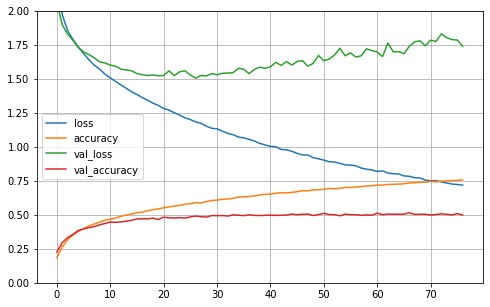

In [7]:
keras_plotter(history)

In [8]:
import numpy as np
y_pred=model1.predict(x_train)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_train_sparse=np.argmax(y_train,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_train_sparse,y_pred_sparse)
print("Train Loss",acc)

import numpy as np
y_pred=model1.predict(x_val)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_val_sparse=np.argmax(y_val,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_val_sparse,y_pred_sparse)
print("Validation Loss",acc)

import numpy as np
y_pred=model1.predict(x_test)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_test_sparse=np.argmax(y_test,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test_sparse,y_pred_sparse)
print("Test Loss",acc)

Train Loss 0.741175
Validation Loss 0.5072
Test Loss 0.5018


In [9]:
num_iter=100

y_prob_pred_temp=np.zeros((10000,10,num_iter))

for i in range(num_iter):
    
    y_prob_pred_temp[:,:,i]=model1.predict(x_test)

y_prob_pred=y_prob_pred_temp.mean(axis=2)
y_prob_pred_sparse=np.argmax(y_prob_pred,axis=1)
y_test_sparse=np.argmax(y_test,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test_sparse,y_prob_pred_sparse)
print("MC Dropout Test Loss",acc)

MC Dropout Test Loss 0.5224
